# Предобработка данных

Когда мы работаем с данными в машинном обучении, они редко бывают идеальными. Чаще всего встречаются:

* пропуски (пустые значения, NaN),
* шум (ошибки ввода, выбросы),
* разные форматы (например, даты как строки),
* категориальные признаки (текст вместо чисел),
* разные масштабы признаков (зарплата в тысячах, рост в метрах).


Если просто скормить такие «грязные» данные алгоритму, то:
модель может выдавать ошибки,
результаты будут искажены,
обучение займет больше времени.
Поэтому важнейший этап перед анализом или построением модели — **предобработка данных (data preprocessing)**.

### Основные шаги предобработки:

1. Загрузка и просмотр данных
    - понять структуру, посмотреть первые строки, размеры, типы данных.

2. Очистка данных
    - обработка пропусков (NaN),
    - исправление ошибок,
    - удаление или корректировка выбросов.

3. Преобразование данных
    - перевод категориальных признаков в числовые,
    - нормализация и стандартизация числовых признаков,
    - работа с датами и текстами.

4. Формирование финального набора данных
    - объединение таблиц,
    - выбор нужных признаков,
    - сохранение в удобный формат для анализа или обучения модели.


### Какие инструменты будем исользовать?

В этом уроке мы рассмотрим три инструмента:

1. **Matlab** для визуального просмотра
2. **Pandas** для обработки табличных данных
3. **Numpy** который используетя внутри многих фреймворков


## NumPy - сердце многих библиотек

Чтобы с библиотекой поработать нужно ее импротировать:

In [75]:
import numpy as np

np.__version__

'2.0.2'

### Почему нужно использовать NumPy?

Когда мы работаем с машинным обучением или анализом данных, у нас почти всегда есть **таблицы чисел**:

* продажи по месяцам,
* температуры по городам,
* признаки клиентов в ML-модели.

В чистом Python такие данные обычно хранят в списках (`list`). Но у списков есть ограничения:

* они **медленные**, потому что Python — интерпретируемый язык;
* нельзя удобно выполнять **векторные операции** (например, умножить весь список на число или сложить два списка элемент-к-элементу);
* мало встроенных инструментов для работы с матрицами (нужно писать свои циклы).

Поэтому был создан **NumPy** — библиотека, которая позволяет:

* хранить данные в специальных массивах (**ndarray**),
* выполнять вычисления **в сотни раз быстрее (C и Fortran)**, чем со списками,
* легко работать с многомерными данными (векторами, матрицами, тензорами),
* использовать готовые **математические и статистические функции**.

Где используется NumPy?

* **Pandas** — для работы с таблицами (DataFrame). Основан на массивах NumPy.
* **Scikit-Learn** — для машинного обучения, обучает модели на массивах NumPy.
* **TensorFlow, PyTorch** — для нейросетей, используют похожие тензоры (часто совместимы с NumPy).
* **Matplotlib** — для визуализации данных (строит графики прямо из массивов NumPy).

То есть **NumPy — фундаментальный кирпич** в Python-экосистеме анализа данных и ML.

In [76]:
# пример 1. Умножение вектора на число
a = [1, 2, 3, 4, 5]

# Python
arr_list = [x*2 for x in a]
print(f'Список Python -> {arr_list}')

# NumPy
arr_numpy = np.array(a)
print(f'Список NumPy -> {arr_numpy * 2}')

Список Python -> [2, 4, 6, 8, 10]
Список NumPy -> [ 2  4  6  8 10]


### Создание массивов

В NumPy все данные хранятся в объектах типа **`ndarray`**. Мы можем создавать такие массивы разными способами:

1. `np.array()` — из списка (или списка списков)
2. `np.zeros()`, `np.ones()`, `np.eye()` - стандартные
3. `np.arange()` и `np.linspace()` - генерация последовательностей
4. `np.logspace()` - последовательность чисел с постоянным шагом по логарифмической шкале
5. `np.diag()` - создание диагональной марицы

In [77]:
# Создание одномерного списка из списка
np.array([1, 2, 3])

array([1, 2, 3])

In [78]:
# Создание двумерного списка (матрицы) из списка списков
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [79]:
# Создание многомерного списка
np.array([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
])

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [80]:
# Нулевая матрица
# Параметр shape = (кол-во строк, кол-во столбцов)
np.zeros(shape = (2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [81]:
# Пример многомерного shape
np.zeros(shape = (2, 3, 3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [82]:
# Матрица состоящая из единиц
np.ones(shape = (3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [83]:
# Создание единичной матрицы (используется в линале часто)
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [84]:
# np.arange(start, stop, step) — как range() в Python, но возвращает массив NumPy
np.arange(0, 15, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [85]:
# np.linspace(start, stop, num) — делит отрезок на равные части, полезно при построении графиков
# где num - кол-во строчек
np.linspace(0.1, 0.2, 5)

array([0.1  , 0.125, 0.15 , 0.175, 0.2  ])

In [86]:
np.logspace(np.log10(10), np.log10(10**3), num=3)

array([  10.,  100., 1000.])

In [87]:
np.diag(np.array([1, 2, 3, 4]))  # Диагональная матрица на основе списка

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

#### 📌 Практическое задание 1

Создайте и выведите:

In [88]:
# 1. Массив из чисел от 5 до 25 с шагом 5. используйте `np.arange()`.
# <- code here

In [89]:
# 2. Единичную матрицу размером 4×4. используйте `np.eye()`.
# <- code here

In [90]:
# 3. Массив из 10 чисел от 0 до 1 включительно. используйте `np.linspace()`.
# <- code here

### Свойства массива

Для получение информации про свойства массива используются следующие атрибуты массива: `shape, ndim, dtype, size`

Создадим массив

In [91]:
explore_array = np.ones((2, 3))
explore_array

array([[1., 1., 1.],
       [1., 1., 1.]])

1. `shape` — форма массива

    Количество строк и столбцов (и вообще размерность по каждой оси).
    Возвращает кортеж.

![pic1](https://logodix.com/logo/2067282.png)

In [92]:
explore_array.shape  # (2, 3) → 2 строки, 3 столбца

(2, 3)

2. `ndim` — число измерений

In [93]:
explore_array.ndim  # 2 → значит, массив двумерный

2

3. `dtype` - тип данных элементов

In [94]:
explore_array.dtype  # float64, может быть еще (int32, int64, float32, ...)

dtype('float64')

4. `size` — количество элементов

In [95]:
explore_array.size

6

### Индексация и срезы

Чтобы анализировать данные, часто нужно брать не весь массив целиком, а его часть: отдельные строки, столбцы или элементы, а иногда и фильтровать значения по условию.

1. Индексация по строкам и столбцам (обращение к элементам по их координатам)

In [96]:
arr = np.array([[10, 20, 30],
                [40, 50, 60]])

In [97]:
arr[0, 1]  # 20 → элемент (строка 0, столбец 1)

np.int64(20)

In [98]:
arr[1, 2]  # 60 → элемент (строка 1, столбец 2)

np.int64(60)

In [99]:
arr[0, :]  # [10 20 30] → вся первая строка

array([10, 20, 30])

In [100]:
arr[:, 1]  # [20 50]    → весь второй столбец

array([20, 50])

2. Срезы `arr[start:stop:step]`

In [101]:
nums = np.array([0, 1, 2, 3, 4, 5, 6])

In [102]:
nums[1:5]  # [1 2 3 4]  → с 1 по 4

array([1, 2, 3, 4])

In [103]:
nums[::2]  # [0 2 4 6]  → через один

array([0, 2, 4, 6])

In [104]:
nums[::-1]  # [6 5 4 3 2 1 0] → разворот

array([6, 5, 4, 3, 2, 1, 0])

3. Булевская индексация (можно выбирать элементы по условию)

    ***Очень мощный инструмент для быстрой фильтрации***

In [105]:
arr > 30

array([[False, False, False],
       [ True,  True,  True]])

In [106]:
arr[arr > 30]

array([40, 50, 60])

4. Диапазон индексов. Создаётся новый заголовок массива, указывающий на те же данные. Изменения, сделанные через такой массив, видны и в исходном массиве.

In [107]:
a = np.array([1, 5, 6, 10, -2, 0, 18])
b = a[0:6]  # создаем ссылки на новый объект
b[1] = -1000
a

array([    1, -1000,     6,    10,    -2,     0,    18])

#### 📌 Практическое задание 2

Дан массив

```py
np.array([[5, 10, 15],
          [20, 25, 30],
          [35, 40, 45]])
```

Найдите:

1. Все элементы второй строки.
2. Все элементы третьего столбца.
3. Все четные по значению (не по позиции элементы).

In [108]:
# num1
# <- code here

In [109]:
# num2
# <- code here

In [110]:
# num3
# <- code here

### Арифметика и операции

*В NumPy операции выполняются сразу поэлементно, без циклов.*

1. Поэлементные операции (Очень удобно при нормализации данных)

In [111]:
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

In [112]:
arr + 10

array([11, 12, 13])

In [113]:
arr * 2

array([2, 4, 6])

In [114]:
arr ** 2

array([1, 4, 9])

In [115]:
arr / 2

array([0.5, 1. , 1.5])

2. Матричное умножение

    В отличие от поэлементного`(*)`, матричное `(@ или np.dot)` работает как в линейной алгебре.

    Выполняется высоко оптимизированное матричное умножение (GEMM) с использованием:
    блочного алгоритма,
    кэш-оптимизации,
    SIMD-инструкций,
    многопоточности.

In [116]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

In [117]:
# сложение поэлементное
A + B

array([[ 6,  8],
       [10, 12]])

In [118]:
# умножение 1
A.dot(B)

array([[19, 22],
       [43, 50]])

In [119]:
# умножение 2

In [120]:
A @ B

array([[19, 22],
       [43, 50]])

#### 📌 Практическое задание 3

Создать квадратную матрицу 4х4 и взять у нее обратную матрицу.

*Подсказка: посмотреть модуль для линейной алгебры `np.linalg`*

In [121]:
# <- code here

### Статистика

В машинном обучении и анализе данных часто нужно быстро получать характеристики массива: сумма, среднее, минимум, максимум, стандартное отклонение и др.

| Функция  | Что делает                       |
| -------- | -------------------------------- |
| `sum()`  | Суммирует все элементы массива   |
| `mean()` | Вычисляет среднее значение       |
| `min()`  | Находит минимальный элемент      |
| `max()`  | Находит максимальный элемент     |
| `std()`  | Вычисляет стандартное отклонение |

In [122]:
arr = np.array([1, 2, 3, 4])

In [123]:
arr.sum()

np.int64(10)

In [124]:
arr.mean()

np.float64(2.5)

In [125]:
arr.min()

np.int64(1)

In [126]:
arr.max()

np.int64(4)

In [127]:
arr.std()

np.float64(1.118033988749895)

Массивы могут быть **многомерными**. Иногда нужно считать статистику:

* **`axis=0`** — по столбцам (вдоль строк)
* **`axis=1`** — по строкам (вдоль столбцов)

In [128]:
mat = np.array([[1, 2, 3],
                [4, 5, 6]])
mat

array([[1, 2, 3],
       [4, 5, 6]])

In [129]:
mat.sum(axis=0)  # [5 7 9] → сумма по столбцам

array([5, 7, 9])

In [130]:
mat.mean(axis=0) # [2.5 3.5 4.5] → среднее по столбцам

array([2.5, 3.5, 4.5])

In [131]:
mat.sum(axis=1)  # [6 15] → сумма по строкам

array([ 6, 15])

In [132]:
mat.mean(axis=1) # [2. 5.] → среднее по строкам

array([2., 5.])

Либо же не указывать `axis` и тогда функции будут применяться к массиву как к списку:

In [133]:
mat.min(), mat.max()

(np.int64(1), np.int64(6))

#### 📌 Практическое задание 4

1. Создайте массив чисел от 1 до 20.
2. Найдите:

   * сумму элементов,
   * среднее значение,
   * максимум и минимум.

In [134]:
# <- code here

### Изменение формы массива

Часто данные нужно подгонять под нужный формат: менять размеры, объединять таблицы или транспонировать.

1. `reshape` — изменение формы массива

* Меняет форму массива без изменения данных.
* Количество элементов **должно совпадать**.



In [135]:
arr = np.arange(6)
print(arr)
reshaped = arr.reshape(6, 1)
print(reshaped)

[0 1 2 3 4 5]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


2. `transpose` — транспонирование

In [136]:
reshaped.T

array([[0, 1, 2, 3, 4, 5]])

3. Объединение массивов

    * **`concatenate`** — объединяет вдоль указанной оси (`axis`).
    * **`vstack`** — вертикально (по строкам).
    * **`hstack`** — горизонтально (по столбцам).

In [137]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
a, b

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [138]:
np.concatenate([a, b], axis=0)  # вертикально

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [139]:
np.vstack([a, b])  # вертикально


array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [140]:
np.concatenate([a, b], axis=1)  # горизонтально

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [141]:
np.hstack([a, b])  # горизонтально

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

### Случайные данные

Задания:

1. Создайте массив из 5 случайных целых чисел от 1 до 50.
2. Создайте матрицу 3х3 со случайными числами из нормального распределения.

💡 **Подсказка:**

* Все функции находятся в **модуле `numpy.random`**.
* Основные полезные функции:

  * `np.random.randint(low, high, size)` — случайные целые числа,
  * `np.random.rand(d0, d1, …)` — равномерное распределение \[0,1),
  * `np.random.randn(d0, d1, …)` — стандартное нормальное распределение (среднее 0, σ=1).



### Элементы линейной алгебры

In [142]:
arr = np.array([[2, 1], [2, 3]])

In [143]:
# определитель матрицы
np.linalg.det(arr)

np.float64(4.0)

In [144]:
# нахождение обратной матрицы
np.linalg.inv(arr)

array([[ 0.75, -0.25],
       [-0.5 ,  0.5 ]])

In [145]:
# нахождение собственных значений и собственных векторов маттрицы
evalues, evectors = np.linalg.eig(arr)
print(evalues)
print(evectors)
np.linalg.eig(arr)

[1. 4.]
[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


EigResult(eigenvalues=array([1., 4.]), eigenvectors=array([[-0.70710678, -0.4472136 ],
       [ 0.70710678, -0.89442719]]))

**Решение СЛАУ с помощью NumPy**

В NumPy для этого есть функция **`np.linalg.solve(A, b)`**, где:

* `A` — матрица коэффициентов (n×n),
* `b` — вектор свободных членов (размер n).

**Пример**

Решим систему:

$$
\begin{cases}
2x + 3y = 8 \\
5x - y = 2
\end{cases}
$$




In [146]:
# Матрица коэффициентов
A = np.array([[2, 3],
              [5, -1]])

# Вектор свободных членов
b = np.array([8, 2])

# Решение
x = np.linalg.solve(A, b)
print("Решение (x, y):", x)

Решение (x, y): [0.82352941 2.11764706]


In [147]:
# Проверка найденного решения на близость двух массивов
np.allclose(A @ x, b)

True

## Pandas - эффективная работа с табличными данными

### Зачем нужен **Pandas**

В современном мире Data Science ключевым этапом любого проекта является **работа с данными**. Данные редко приходят в готовом для анализа виде — чаще всего это сырые таблицы, CSV-файлы, выгрузки из баз данных или Excel-документы. Чтобы из них извлечь пользу, необходимо уметь:

* загружать данные разных форматов;
* просматривать структуру таблицы и получать базовую статистику;
* фильтровать и выбирать нужные подмножества;
* преобразовывать, объединять и очищать данные;
* готовить таблицу для последующего анализа или обучения моделей машинного обучения.

**Что такое Pandas?**

* Pandas — это ***надстройка*** над **NumPy**, которая добавляет удобные структуры данных для работы с таблицами:

  * **Series** (одномерные массивы с индексами);
  * **DataFrame** (таблицы, где каждая колонка — это Series).
* Поддерживает работу с **разнородными типами данных** (числа, строки, даты, булевы значения).
* Позволяет работать как с маленькими файлами, так и с большими наборами данных (сотни тысяч строк).

👉 На практике Pandas — это инструмент, без которого не обходится ни один аналитик или data scientist.

### Описание датасета **Telecom Churn**

Датасет представляет собой **информацию о клиентах телеком-компании**. Его цель — помочь спрогнозировать, уйдёт ли клиент в ближайшее время **(churn)** или останется.

Ниже приведены ключевые признаки (колонки):

| Колонка                  | Тип данных              | Пример значения | Описание                                                   |
| ------------------------ | ----------------------- | --------------- | ---------------------------------------------------------- |
| `State`                  | категориальный          | KS              | Штат, в котором проживает клиент                           |
| `Account length`         | числовой                | 128             | Длительность обслуживания клиента (в днях)                 |
| `Area code`              | числовой                | 415             | Телефонный код региона                                     |
| `International plan`     | категориальный (Yes/No) | No              | Наличие международного тарифа                              |
| `Voice mail plan`        | категориальный (Yes/No) | Yes             | Наличие голосовой почты                                    |
| `Number vmail messages`  | числовой                | 25              | Количество голосовых сообщений                             |
| `Total day minutes`      | числовой                | 265.1           | Общее количество минут звонков днём                        |
| `Total day calls`        | числовой                | 110             | Количество звонков днём                                    |
| `Total day charge`       | числовой                | 45.07           | Стоимость дневных звонков                                  |
| `Total eve minutes`      | числовой                | 197.4           | Минуты звонков вечером                                     |
| `Total eve calls`        | числовой                | 99              | Количество звонков вечером                                 |
| `Total eve charge`       | числовой                | 16.78           | Стоимость вечерних звонков                                 |
| `Total night minutes`    | числовой                | 244.7           | Минуты звонков ночью                                       |
| `Total night calls`      | числовой                | 91              | Количество звонков ночью                                   |
| `Total night charge`     | числовой                | 11.01           | Стоимость ночных звонков                                   |
| `Total intl minutes`     | числовой                | 10.0            | Минуты международных звонков                               |
| `Total intl calls`       | числовой                | 3               | Количество международных звонков                           |
| `Total intl charge`      | числовой                | 2.70            | Стоимость международных звонков                            |
| `Customer service calls` | числовой                | 1               | Количество звонков в службу поддержки                      |
| `Churn`                  | булевый                 | False           | Целевая переменная: ушёл клиент (True) или остался (False) |

### Для чего создавался датасет

Этот датасет был собран для решения задачи **Customer Churn Prediction** — предсказания оттока клиентов.

* **Бизнес-проблема**: телеком-операторы теряют прибыль, когда клиенты уходят к конкурентам.
* **Задача анализа**: выявить факторы, которые влияют на уход клиента (например, частые обращения в поддержку, высокая стоимость звонков, отсутствие нужного тарифа).
* **Применение**:

  * постройка моделей машинного обучения для предсказания оттока;
  * сегментация клиентов по риску ухода;
  * разработка стратегий удержания клиентов (бонусы, скидки, новые тарифы).



### Описательная работа с датасетом (статистика и информация)

In [148]:
# Подключение гугл колаба
from pathlib import Path
from google.colab import drive

drive_str = '/content/drive'
drive_path = Path(drive_str)
drive.mount(drive_str)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
# Путь до Dataset
ds_path = drive_path / 'MyDrive' / 'МАИ студенты 2025-2026' / 'Practice 1' / 'telecom_churn.csv'

Загрузим файл `telecom_churn.csv` с помощью метода `read_csv()`, и выведем первые три строки с помошью метода `head()`

In [150]:
import pandas as pd
pd.__version__

'2.2.2'

In [151]:
df = pd.read_csv(ds_path)
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


Узнаем размерность DataFrame

In [152]:
df.shape  # (3333 строк, 20 столбцов)

(3333, 20)

Можем так же получить информацию про название колонок и их тип

In [153]:
df.columns, type(df.columns[0])

(Index(['State', 'Account length', 'Area code', 'International plan',
        'Voice mail plan', 'Number vmail messages', 'Total day minutes',
        'Total day calls', 'Total day charge', 'Total eve minutes',
        'Total eve calls', 'Total eve charge', 'Total night minutes',
        'Total night calls', 'Total night charge', 'Total intl minutes',
        'Total intl calls', 'Total intl charge', 'Customer service calls',
        'Churn'],
       dtype='object'),
 str)

Выведем общую информацию о столбцах.

К общей информации относится:
- индекс,
- название столбцов,
- кол-во не нулевых элементов в наборе и тип данных в столбце,
- объем памяти

**Важно отметить, что елси тип данных во всем столбце невозможно однозначно определить, то столбцу назначается тип -> Object.**

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Исходные типы данных можно преобразовать

In [155]:
df2 = df.copy()  # Сделаем копию исходного DataFrame
df3 = df.copy()  # Сделаем копию исходного DataFrame

# 1 способ astype()
df2['Total intl calls'] = df2['Total intl calls'].astype('int64')
print(df2['Total intl calls'].head(2))

# 2 способ, если мы знаем конкретные категории
df3['Churn'] = df3['Churn'].map({True: 1, False: 0})
print(df3['Churn'].head(2))

df2, df3 = None, None  # убираем ссылки

0    3
1    3
Name: Total intl calls, dtype: int64
0    0
1    0
Name: Churn, dtype: int64


Таким нехитрым способом можно ***вывести общие статистики вещественных фичей*** по столбцам во всей таблице

In [156]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [157]:
# Если задать уточнение типов, которые нас интересуют, то можно собрать более узкий срез статистик
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


Либо же посмотреть статистики отдельных столбцов

In [158]:
df["Churn"].mean(), df["Churn"].min(), df["Churn"].max(), df["Churn"].std(), df["Churn"].median()

(np.float64(0.14491449144914492),
 np.False_,
 np.True_,
 np.float64(0.352067423624126),
 np.float64(0.0))

Также можем посмотреть на количество уникальных элементов в столбце(гистограмма)

In [159]:
df["Churn"].value_counts()

,count
Churn,
False,2850
True,483


In [160]:
# Дополнительным параметром normalize=True можно нормализовать переменные.
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
False,0.855086
True,0.144914


### Сортировка данных

Отсортируем таблицу по столбцу Total day charge в порядке невозрастания.

In [161]:
df.sort_values(by="Total day charge", ascending=False).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True
975,DE,129,510,No,No,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
1679,OK,82,510,No,No,0,329.8,73,56.07,208.3,120,17.71,267.1,102,12.02,10.6,6,2.86,0,True
2028,SD,93,510,No,No,0,328.1,106,55.78,151.7,89,12.89,303.5,114,13.66,8.7,3,2.35,1,True
197,TX,208,510,No,No,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True


In [162]:
# Так же столбцов может быть намного больше для сорировки, тогда и столбцы и направления передаем разными списками
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,False
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,False
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,False
1165,VT,50,415,Yes,Yes,26,307.1,94,52.21,289.4,78,24.60,174.9,109,7.87,8.0,3,2.16,0,False
3207,DC,93,408,No,Yes,22,306.2,123,52.05,189.7,83,16.12,240.3,107,10.81,11.7,2,3.16,0,False
2478,TN,123,415,No,Yes,34,305.2,80,51.88,156.5,109,13.30,280.0,81,12.60,13.2,7,3.56,1,False
1355,TX,50,408,No,Yes,31,302.7,93,51.46,240.5,119,20.44,193.9,103,8.73,13.6,14,3.67,3,False
1830,CT,50,408,No,No,0,301.7,82,51.29,167.1,118,14.20,72.2,89,3.25,10.5,6,2.84,1,False


#### Примеры

1. Каковы средние значения числовых характеристик для непостоянных пользователей?

Тут можно поступить так же как и в NumPy, использовать удобный фильтр

In [163]:
df[df["Churn"] == 1].head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


`select_dtypes()` - позволяет выбрать из набора данных столбцы с определенным типом данных

In [164]:
df.select_dtypes(include=np.number)[df["Churn"] == 1].mean()  # <- ответ на вопрос

,0
Account length,102.664596
Area code,437.817805
Number vmail messages,5.115942
Total day minutes,206.914079
Total day calls,101.335404
Total day charge,35.175921
Total eve minutes,212.410145
Total eve calls,100.561077
Total eve charge,18.054969
Total night minutes,205.231677


2. Сколько времени (в среднем) непостоянные пользователи проводят на телефоне в дневное время?

Опять же применим операцию маскирования чтобы выделить непостоянных пользователей, а затем выберем нужный нам столбец и посчитаем среднее

In [165]:
df[df["Churn"] == 1]["Total day minutes"].mean()

np.float64(206.91407867494823)

3. Какова максимальная продолжительность международных звонков среди постоянных пользователей (`Churn == 0`), у которых нет международного тарифного плана?

Здесь нам нужна фильтрация по двум критериям: `Churn == 0` - постоянный пользователь и `International plan == No` - отсутствие международного плана.

In [166]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

### Индексация

Набор данных может быть проиндексирован как по строкам, так и по столбцам. Для этого используется метод `.loc(row range, col range)`

In [167]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [168]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [169]:
# Также совершенно спокойно можно выполнять простые срезы по строкам не обращаясь к методу `.loc`
df[-2:]  # последние две строки

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Также очень просто можно применить к набору данных преобразование в виде функции одного аргумента(так называемый Mapping). Функция должна иметь 1 входной аргумент(текущее значение) и 1 выходной аргумент(результат обработки)

In [170]:
df.apply(np.max)[:3]

,0
State,WY
Account length,243
Area code,510


In [171]:
df.apply(lambda x: f'@@@{x}@@@')[:3]

,0
State,@@@0 KS\n1 OH\n2 NJ\n3 ...
Account length,@@@0 128\n1 107\n2 137\n3 ...
Area code,@@@0 415\n1 415\n2 415\n3 ...


Также полученные результаты можно использовать для маскирования

In [172]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True


### Группировка

***Давайте посмотрим на различие по статистикам между постоянными и не постоянными пользователями***

Для этого нужно применить группировку данных по столбцу `Churn` и посмотреть на определенные столбцы

In [173]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

#  Группировка        Выбор столбцов   Показываем статистики(без перцентилей для упрощения)
df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
False            2850.0  175.175754  50.181655  0.0  177.2  315.6   
True              483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
False            2850.0  199.043298  50.292175   0.0  199.6  361.8   
True              483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2850.0  200.133193  51.105032  23.2  200.25  395.0  
True                483.0  205.231677  47.132825  47.4  204.80  354.9

Также мы можем указать аггрегационные функции которые мы хотим видеть

In [174]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]
df.groupby(["Churn"])[columns_to_show].agg(["mean", "std", "min", "max"])

Total day minutes                        Total eve minutes             \
                   mean        std  min    max              mean        std   
Churn                                                                         
False        175.175754  50.181655  0.0  315.6        199.043298  50.292175   
True         206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
        min    max                mean        std   min    max  
Churn                                                           
False   0.0  361.8          200.133193  51.105032  23.2  395.0  
True   70.9  363.7          205.231677  47.132825  47.4  354.9

**Что такое сводная таблица?**

Сводная таблица (**crosstab**) — это способ посчитать, **сколько раз встречаются разные комбинации значений** в двух (или больше) колонках.

То есть мы берём:

* одну колонку (например, `Churn` — ушёл клиент или нет),
* другую колонку (например, `International plan` — есть ли международный план),
  и строим таблицу, где каждая ячейка показывает, сколько клиентов попадает в эту комбинацию.

**Пример**

In [175]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


Как это читать пошагово:

1. **2664** клиентов **не ушли** (`Churn = False`) и у них **нет международного плана**.
2. **186** клиентов **не ушли**, но у них **есть международный план**.
3. **346** клиентов **ушли** (`Churn = True`), хотя у них **нет международного плана**.
4. **137** клиентов **ушли**, и у них **есть международный план**.

**Зачем это нужно?**

* Можно сразу увидеть, что **клиенты с международным планом чаще уходят**, чем без него (у True/Yes отношение заметно выше).
* Это помогает находить **зависимости между признаками и целевой переменной**.


## Matplotlib, Seaborn - для визуализации данных

Повторно импортируем необходимые библиотеки, чтобы не искать их выше

In [176]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Загрузим другой датасет, чтобы набить руку

In [177]:
# Подключение гугл колаба
from pathlib import Path
from google.colab import drive

drive_str = '/content/drive'
drive_path = Path(drive_str)
drive.mount(drive_str)

# Путь до Dataset
ds_path = drive_path / 'MyDrive' / 'МАИ студенты 2025-2026' / 'Practice 1' / 'loan_data.csv'

df = pd.read_csv(ds_path)
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory

In [178]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


**Описание датасета Loan Data**

Датасет содержит информацию о заявках на кредиты в банке.
**Цель анализа** — предсказать, будет ли заявка на кредит **одобрена** или **отклонена** (колонка `Loan_Status`).

**Колонки и их описание**

| Колонка             | Тип данных     | Пример значения | Описание                                                                  |
| ------------------- | -------------- | --------------- | ------------------------------------------------------------------------- |
| `Loan_ID`           | строка         | LP001002        | Уникальный идентификатор кредита                                          |
| `Gender`            | категориальный | Male            | Пол заёмщика                                                              |
| `Married`           | категориальный | Yes             | Состоит ли заёмщик в браке                                                |
| `Dependents`        | категориальный | 0               | Количество иждивенцев                                                     |
| `Education`         | категориальный | Graduate        | Образование заёмщика (Graduate / Not Graduate)                            |
| `Self_Employed`     | категориальный | No              | Самозанятый ли заёмщик                                                    |
| `ApplicantIncome`   | числовой       | 5849            | Доход основного заёмщика                                                  |
| `CoapplicantIncome` | числовой       | 1508.0          | Доход со-заявителя (если есть)                                            |
| `LoanAmount`        | числовой       | 128.0           | Запрашиваемая сумма кредита (в тыс. единиц)                               |
| `Loan_Amount_Term`  | числовой       | 360.0           | Срок кредита (в месяцах)                                                  |
| `Credit_History`    | числовой (0/1) | 1.0             | История кредитов (1 — есть положительная история, 0 — плохая/отсутствует) |
| `Property_Area`     | категориальный | Urban           | Район проживания (Urban / Rural / Semiurban)                              |
| `Loan_Status`       | категориальный | Y               | Целевая переменная: одобрен ли кредит (Y — одобрен, N — отказ)            |

**Для чего создавался датасет**

Этот датасет был собран для задачи **Credit Risk Analysis** — предсказания вероятности одобрения кредита.

* **Бизнес-проблема**: банку важно понимать, каким клиентам можно доверять (одобрять кредиты), а каким нет, чтобы снизить риски невозврата.
* **Аналитическая задача**: выявить, какие факторы влияют на одобрение кредита (например, доход, наличие кредитной истории, количество иждивенцев).
* **Применение**:

  * построение моделей машинного обучения для предсказания кредитного риска;
  * автоматизация процесса принятия решений;
  * улучшение стратегии выдачи кредитов.

### Визуализация данных

Правила хорошей визуализации:

* понятна любому человеку, а не только вам
* исчерпывающая, т.е. не оставляет открытых вопросов после изучения
* наталкивает на полезные мысли и выводы

#### Pie plot

Плюсы:

* простой и понятный график
* ясно демонстрирует пропорции частей целого

Минусы:

* плохо подходит для сравнения большого количества долей
* не работает с отрицательными значениями

Давате попробуем с вами расмотреть категориальный признак `Property_Area`

In [179]:
pr_area = df['Property_Area']
pr_area_normal = list(zip(
    pr_area.value_counts().index,
    pr_area.value_counts(normalize=True)
))

pr_area.value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [180]:
labels, params = zip(
    *[(f'{row[0]} ({round(row[1], 2)}%)', row[1]) for row in pr_area_normal]
)
labels, params

(('Semiurban (0.38%)', 'Urban (0.33%)', 'Rural (0.29%)'),
 (0.3794788273615635, 0.3289902280130293, 0.2915309446254072))

Нарисуем это распределение

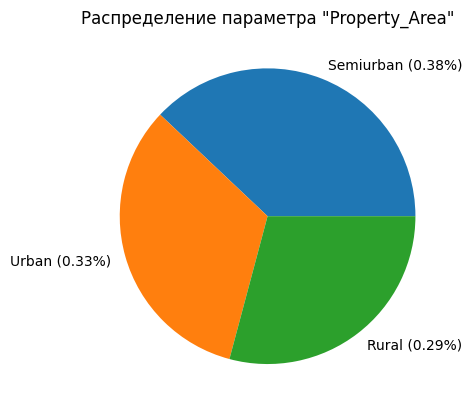

In [181]:
plt.pie(
    params,
    labels = labels
)
plt.title('Распределение параметра "Property_Area"')
plt.show()

Либо можно красиво стилизовать через seaborn

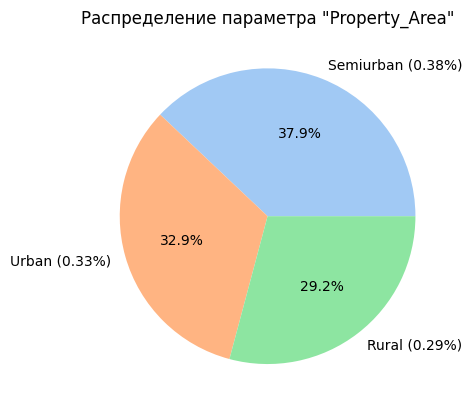

In [182]:
colors = sns.color_palette("pastel")[0:len(params)]
plt.pie(params, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Распределение параметра "Property_Area"')
plt.show()

#### Bar plot

Сохраняет преимущества pie plot, при этом решает его проблемы и добавляет ясности в график, однако при большом количестве категорий график будет перегружен.
Bar plot - для категориальных*, аналог для непрерывных величин - Hist plot.

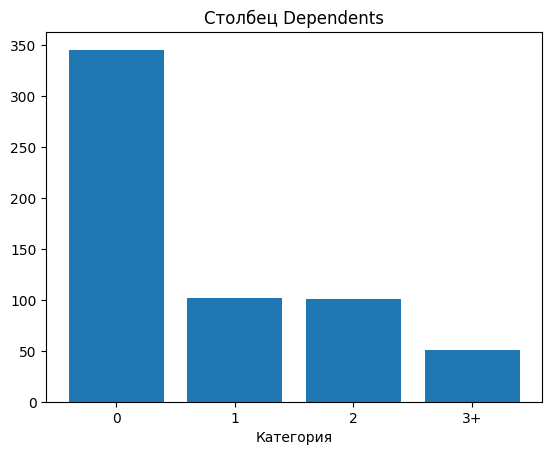

In [183]:
plt.bar(
    df['Dependents'].value_counts().index,
    df['Dependents'].value_counts().values
)
plt.title('Столбец Dependents')
plt.xlabel('Категория')
plt.show()


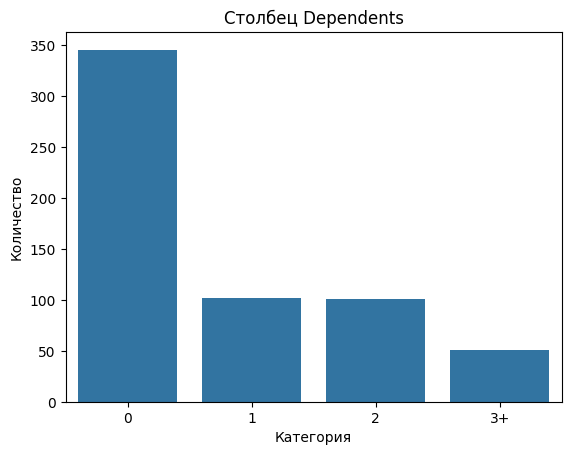

In [184]:
sns.countplot(x="Dependents", data=df, order=df['Dependents'].value_counts().index)
plt.title('Столбец Dependents')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.show()


#### Box plot

Ящик с усами :)


Плюсы:
* показывает оценку распределения
* показывает выбросы

Минусы:
* точно не для категориальных признаков
* когда нужно проверить много данных – вручную сложно и долго

Расмотрим атрибут `LoanAmount`, который показывает сумму запрашиваемого кредита (в тыс.). У имеется некоторое кол-во пустых значений, от которых нужно избавиться

In [185]:
df.dropna(  # удаляем пустые строки
    subset=['LoanAmount'],  # по колонке LoanAmount
    inplace=True  # на метсте, не создавая копии
)

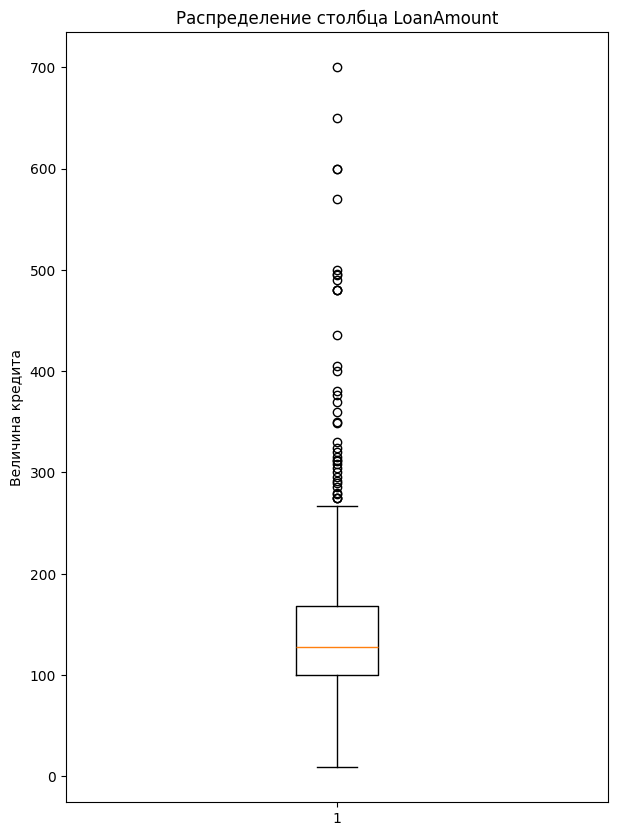

In [186]:
plt.figure(figsize=(7, 10))
plt.boxplot(df['LoanAmount'])
plt.title('Распределение столбца LoanAmount')
plt.ylabel('Величина кредита')
plt.show()

* **Прямоугольник (ящик)** — от 25-го перцентиля (Q1) до 75-го перцентиля (Q3).
  → примерно от \~100 до \~160 (кредиты в этих границах у половины людей).

* **Оранжевая линия внутри** — медиана (Q2).
  → \~130, то есть половина кредитов ≤130, половина ≥130.

* **«Усы» (линии, отходящие от ящика)** — диапазон «нормальных» значений:
  берутся границы Q1 − 1.5×IQR и Q3 + 1.5×IQR.
  → нижний ус идёт примерно до 0–10, верхний — до \~270.

* **Кружочки выше** — это выбросы.
  → Всё, что выше \~270, считается слишком большим по сравнению с основной массой данных.


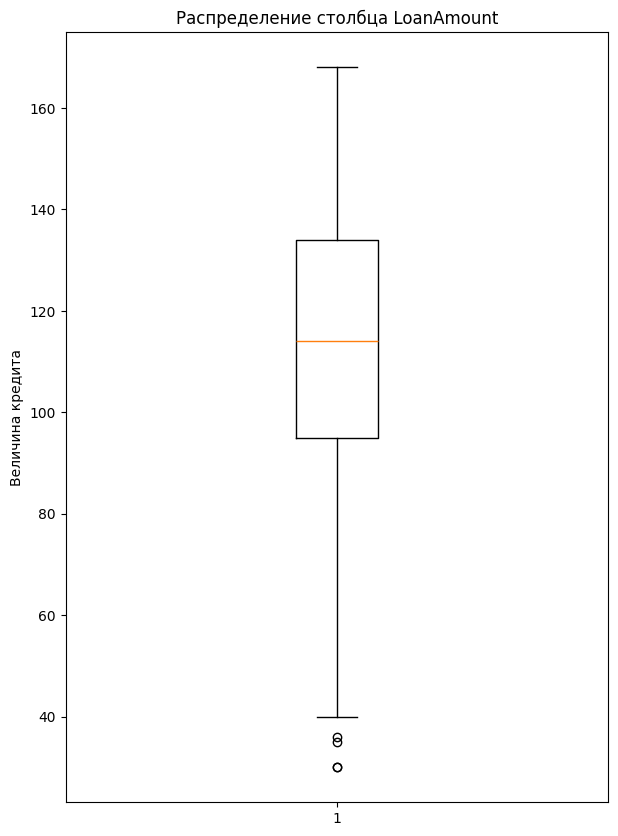

In [187]:
# Отсечение по процентам. Например, оставить только 1–75 перцентили

lower = df['LoanAmount'].quantile(0.01)
upper = df['LoanAmount'].quantile(0.75)

df_no_outliers = df[(df['LoanAmount'] >= lower) & (df['LoanAmount'] <= upper)]

plt.figure(figsize=(7, 10))
plt.boxplot(df_no_outliers['LoanAmount'])
plt.title('Распределение столбца LoanAmount')
plt.ylabel('Величина кредита')
plt.show()

#### Scatterplot

Scatterplot (точечная диаграмма) — это способ показать зависимость двух числовых переменных. Каждая точка = одно наблюдение.

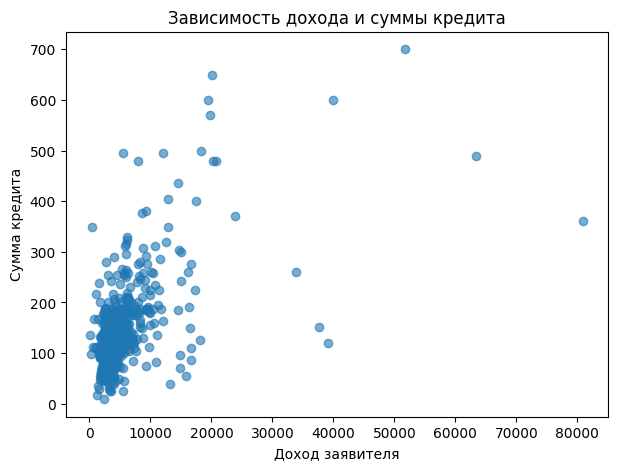

In [188]:
plt.figure(figsize=(7,5))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], alpha=0.6)
plt.title('Зависимость дохода и суммы кредита')
plt.xlabel('Доход заявителя')
plt.ylabel('Сумма кредита')
plt.show()

Тут не очень понятно, нужно избавиться от выбросов

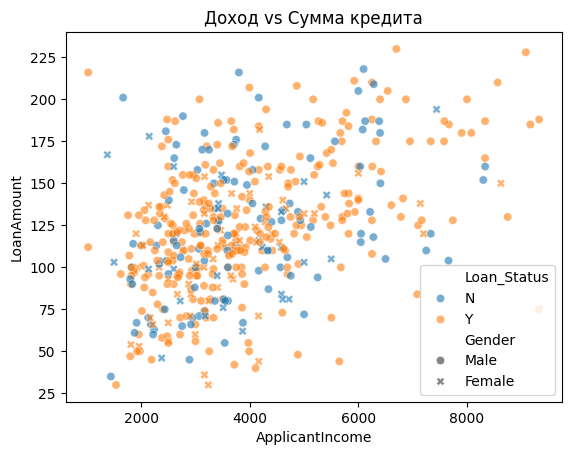

In [189]:
lower_1 = df['LoanAmount'].quantile(0.01)
upper_1 = df['LoanAmount'].quantile(0.9)
lower_2 = df['ApplicantIncome'].quantile(0.01)
upper_2 = df['ApplicantIncome'].quantile(0.9)

df_no_outliers = df[(df['LoanAmount'] >= lower_1) & (df['LoanAmount'] <= upper_1) & (df['ApplicantIncome'] >= lower_2) & (df['ApplicantIncome'] <= upper_2)]

sns.scatterplot(
    data=df_no_outliers,
    x="ApplicantIncome",
    y="LoanAmount",
    hue="Loan_Status",   # цвет = статус
    style="Gender",      # форма точки = пол
    alpha=0.6
)

plt.title('Доход vs Сумма кредита')
plt.show()

#### Line graph

Line graph (линейный график) нужен, когда важно показать изменение числового значения во времени или по порядку.

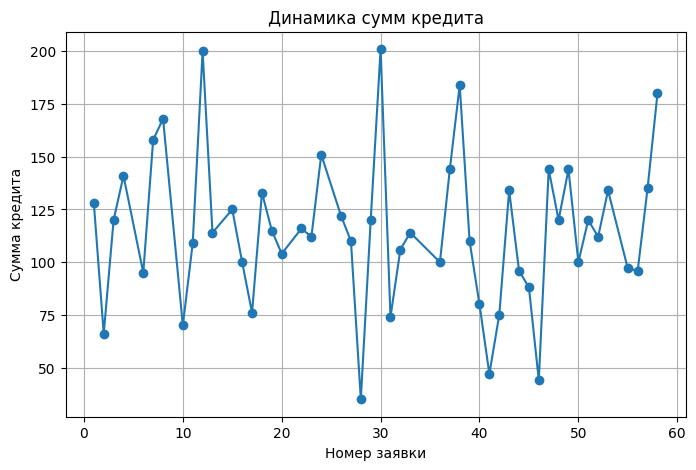

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df_no_outliers['LoanAmount'][:50], marker='o')  # первые 50 значений
plt.title('Динамика сумм кредита')
plt.xlabel('Номер заявки')
plt.ylabel('Сумма кредита')
plt.grid(True)
plt.show()

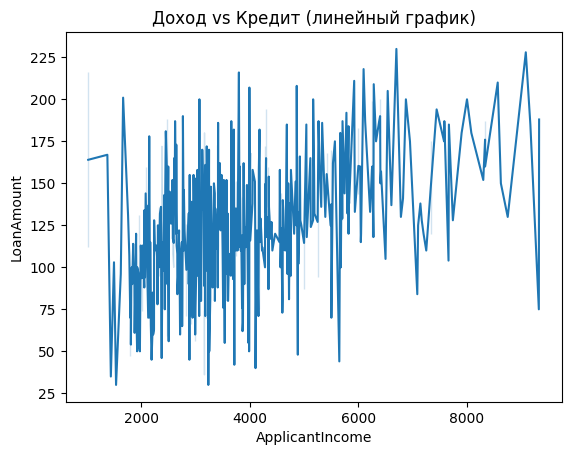

In [191]:
sns.lineplot(data=df_no_outliers, x='ApplicantIncome', y='LoanAmount')
plt.title('Доход vs Кредит (линейный график)')
plt.show()

### 📌 Практическое задание 5

1. **Гистограмма доходов**
   Постройте распределение дохода основного заёмщика (`ApplicantIncome`) и со-заявителя (`CoapplicantIncome`) с помощью `sns.histplot`. Используйте разный цвет для каждого типа дохода.





In [ ]:
# 1. Гистограмма доходов
plt.figure(figsize=(10,5))

sns.histplot(
    # <- данные сюда
    color='blue',
    label='ApplicantIncome',
    kde=True,
    bins=30
)

sns.histplot(
    # <- данные сюда
    color='green',
    label='CoapplicantIncome',
    kde=True,
    bins=30
)

plt.title("Распределение доходов заёмщиков и со-заявителей")
plt.xlabel("Доход")
plt.ylabel("Количество")
plt.legend()
plt.show()

2. **Boxplot: доход vs. образование**
   Постройте график `sns.boxplot`, показывающий распределение дохода заёмщиков в зависимости от их образования (`Education`). Сделайте график информативным (подписи осей, заголовок).


In [ ]:
# 2. Boxplot: доход vs. образование
plt.figure(figsize=(8,5))

# sns.boxplot(## Добавить тут x, y, data ##)

plt.title("Доход заёмщиков в зависимости от образования")
plt.xlabel("Образование")
plt.ylabel("Доход")
plt.show()


3. **Countplot: семейное положение и одобрение кредита**
   Используя `sns.countplot`, постройте график, показывающий количество одобренных и отклонённых кредитов (`Loan_Status`) в зависимости от семейного положения (`Married`). Разделите столбцы по цвету с помощью параметра `hue='Loan_Status'`.



In [ ]:
# 3. Countplot: семейное положение и одобрение кредита
plt.figure(figsize=(8,5))

# sns.countplot(x=, hue=, data=)

plt.title("Количество одобренных и отклонённых кредитов по семейному положению")
plt.xlabel("Семейное положение")
plt.ylabel("Количество")
plt.show()

4. **Scatterplot: доход vs. сумма кредита**
   Используя `sns.scatterplot`, визуализируйте связь между суммой кредита (`LoanAmount`) и доходом (`ApplicantIncome`). Добавьте цвет по статусу кредита (`Loan_Status`) и размер точки в зависимости от количества иждивенцев (`Dependents`).

In [ ]:
# 4. Scatterplot: доход vs. сумма кредита
plt.figure(figsize=(10,6))

# sns.scatterplot(x=, y=, hue=, size=, sizes=, alpha=, data=)

plt.title("Связь дохода и суммы кредита с учётом одобрения и количества иждивенцев")
plt.xlabel("Доход заёмщика")
plt.ylabel("Сумма кредита (тыс. ед.)")
plt.show()

5. **Heatmap: корреляция числовых признаков**
   Постройте тепловую карту (`sns.heatmap`) для числовых колонок (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`) чтобы увидеть взаимосвязи между ними.

In [ ]:
# 5. Heatmap: корреляция числовых признаков
plt.figure(figsize=(8,6))

# numeric_cols = [ ## атрибуты тут ## ]
# corr = df[].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция числовых признаков")
plt.show()